In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

width: 1280, height: 960


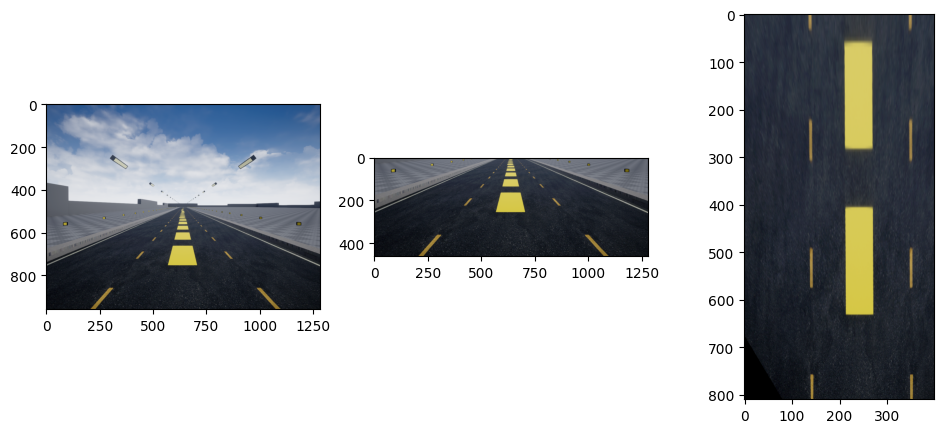

In [139]:
# %%timeit
def apply_gaussian_blur(img, kernel_size=(5, 5)):
    return cv2.GaussianBlur(img, kernel_size, 0)

def apply_canny_edge(img, low_threshold=100, high_threshold=200):
    return cv2.Canny(img, low_threshold, high_threshold)

def apply_warp(img):
    IMAGE_H = img.shape[0]
    IMAGE_W = img.shape[1]

    src = np.float32([[0, IMAGE_H], [1207, IMAGE_H], [0, IMAGE_H // 10], [IMAGE_W, IMAGE_H // 10]])
    dst = np.float32([[569, IMAGE_H], [711, IMAGE_H], [0, 0], [IMAGE_W, 0]])

    img_crop = img[500:(IMAGE_H), :] # Apply np slicing for ROI crop

    M = cv2.getPerspectiveTransform(src, dst) # The transformation matrix
    # Minv = cv2.getPerspectiveTransform(dst, src) # Inverse transformation

    warped_img = cv2.warpPerspective(img_crop, M, (IMAGE_W, IMAGE_H)) # Image warping
    warped_img = warped_img[0:IMAGE_H-150, 400:800]

    return img_crop,  warped_img


img = cv2.imread('./imgs/big/0_0_0.png', cv2.IMREAD_COLOR) # Read the test img
print(f"width: {IMAGE_W}, height: {IMAGE_H}")

img_crop, warped_img = apply_warp(img)
gauss_img = apply_gaussian_blur(warped_img)
canny_img = apply_canny_edge(gauss_img)

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[1].imshow(cv2.cvtColor(img_crop, cv2.COLOR_BGR2RGB))
axs[2].imshow(cv2.cvtColor(warped_img, cv2.COLOR_BGR2RGB))
plt.show()

45